<a href="https://colab.research.google.com/github/amilyk/Agentic-ai-notes/blob/main/market_research_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install "docstring-parser>=0.15,<1.0"
!pip install "httpx[http2]==0.28.1"
!pip install aisuite --no-deps
!pip install tavily
!pip install anthropic

In [34]:
!touch .env
!echo "OPENAI_API_KEY='your-openai'" > .env
!echo "TAVILY_API_KEY='your-tavily'" >> .env
!echo "DEEPSEEK_API_KEY='your-deepseek'" >> .env
!echo "HF_TOKEN='your-hf'" >> .env
# !echo "DLAI_TAVILY_BASE_URL='https://api.tavily.com'" >> .env

In [35]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

In [37]:
# os.getenv("HF_TOKEN")

In [78]:
# =========================
# 导入
# =========================

# --- 标准库 ---
import base64
import json
import os
import re
from datetime import datetime
from io import BytesIO

# --- 第三方 ---
import requests
import openai
from PIL import Image
from dotenv import load_dotenv
from IPython.display import Markdown, display
import aisuite

# --- 本地 / 项目 ---
import tools
import agent_utils as utils


# =========================
# 环境与客户端
# =========================
load_dotenv()
client = aisuite.Client()

# 可用工具

In [20]:
#联网搜索太阳镜时尚趋势
tools.tavily_search_tool('trends in sunglasses fashion')

[{'title': "2025's Top 10 Sunglasses Trends: Chrome Tints & '90s Style - Byrdie",
  'content': "+ Hair Styling # 2025's Top Sunglasses Trends to Try: Chrome Tints and '90s Silhouettes **Read on for 10 2025 sunglasses trends to try this spring and summer**, highlighting that there's plenty of ways to refresh your look, no matter your style. Sporty silhouettes are another standout sunglasses trend of the moment, with a major emphasis on designs that feel elevated and street style-ready. Colorful tinted lenses have gone through major stints of popularity over the decades, and 2025 is looking to be a new era for the recurrent sunglasses trend. The cat-eye sunglasses silhouette never goes out of style. This last one certainly won’t be for everyone—however, if you’re looking for a sunglasses trend that stands out from the crowd, opt for a pair with maximalist detailing on the rims.",
  'url': 'https://www.byrdie.com/2025-sunglasses-trends-11682002'},
 {'title': 'Sunglasses from runways Fall 

In [21]:
#当前库存数据(本地dataframe实现)
tools.product_catalog_tool()

[{'name': 'Aviator',
  'item_id': 'SG001',
  'description': 'Originally designed for pilots, these teardrop-shaped lenses with thin metal frames offer timeless appeal. The large lenses provide excellent coverage while the lightweight construction ensures comfort during long wear.',
  'quantity_in_stock': 23,
  'price': 103},
 {'name': 'Wayfarer',
  'item_id': 'SG002',
  'description': 'Featuring thick, angular frames that make a statement, these sunglasses combine retro charm with modern edge. The rectangular lenses and sturdy acetate construction create a confident look.',
  'quantity_in_stock': 6,
  'price': 92},
 {'name': 'Mystique',
  'item_id': 'SG003',
  'description': 'Inspired by 1950s glamour, these frames sweep upward at the outer corners to create an elegant, feminine silhouette. The subtle curves and often embellished temples add sophistication to any outfit.',
  'quantity_in_stock': 3,
  'price': 88},
 {'name': 'Sport',
  'item_id': 'SG004',
  'description': 'Designed for 

# 组建市场调研团队

## 市场调研智能体

In [22]:
def market_research_agent(return_messages: bool = False):

    utils.log_agent_title_html("Market Research Agent", "🕵️‍♂️")

    prompt_ = f"""
你是一名时尚市场调研代理，负责为夏季太阳镜活动准备趋势分析。

目标：
1. 使用网页搜索探索与太阳镜相关的当前时尚趋势。
2. 查看内部产品目录，识别与这些趋势相契合的商品。
3. 从目录中推荐一个或多个最符合新兴趋势的产品。
4. 如需注明，今天的日期是 {datetime.now().strftime("%Y-%m-%d")}。

可调用以下工具：
- tavily_search_tool：发现外部网络趋势。
- product_catalog_tool：检查内部太阳镜目录。

完成分析后，请总结：
- 你发现的 2–3 个主要趋势。
- 与这些趋势匹配的目录产品。
- 为何它们适合夏季活动的理由说明。
"""
    messages = [{"role": "user", "content": prompt_}]
    tools_ = tools.get_available_tools()

    while True:
        response = client.chat.completions.create(
            # model="openai:o4-mini",
            model="deepseek:deepseek-chat",
            messages=messages,
            tools=tools_,
            tool_choice="auto"
        )

        msg = response.choices[0].message

        if msg.content:
            utils.log_final_summary_html(msg.content)
            return (msg.content, messages) if return_messages else msg.content

        if msg.tool_calls:
            for tool_call in msg.tool_calls:
                utils.log_tool_call_html(tool_call.function.name, tool_call.function.arguments)
                result = tools.handle_tool_call(tool_call)
                utils.log_tool_result_html(result)

                messages.append(msg)
                messages.append(tools.create_tool_response_message(tool_call, result))
        else:
            utils.log_unexpected_html()
            return ("[⚠️ Unexpected: No tool_calls or content returned]", messages) if return_messages else "[⚠️ Unexpected: No tool_calls or content returned]"

In [23]:
market_research_result = market_research_agent()

## 平面设计智能体

文生图替换成国内大模型或者huggingface开源方案

In [65]:
#测试文生图
# openai_client = openai.OpenAI(
#     api_key=os.getenv("HF_TOKEN"),
#     base_url="https://router.huggingface.co/v1"
#     )
# prompt = "请用英文详细描述一只戴着太阳镜、坐在沙滩上的猫，背景是蓝色的大海和白云。"
# vl_resp = openai_client.chat.completions.create(
#     model="Qwen/Qwen3-VL-8B-Instruct",
#     messages=[{"role": "user", "content": prompt}],
# )
# generated_prompt = vl_resp.choices[0].message.content.strip()

# ② 用 Stable Diffusion XL 生成图片《不支持openai接口》？？
# img_resp = openai_client.images.generate(
#     model="stabilityai/stable-diffusion-xl-base-1.0",
#     prompt=generated_prompt,
#     size="1024x1024",
#     n=1,
# )
# image_url = img_resp.data[0].url

import os
from huggingface_hub import InferenceClient

client = InferenceClient(
    provider="nscale",
    api_key=os.environ["HF_TOKEN"],
)

# output is a PIL.Image object
image = client.text_to_image(
    generated_prompt,
    model="stabilityai/stable-diffusion-xl-base-1.0",
)
image.save("test_sd.png", format="PNG")

In [71]:
from IPython.display import Image, display
Image("test_sd.png")

In [81]:
def graphic_designer_agent(trend_insights: str, caption_style: str = "short punchy", size: str = "1024x1024") -> dict:

    """
    使用 aisuite 生成营销提示/文案，并直接使用 OpenAI 生成图像。

    参数：
        trend_insights (str)：来自调研智能体的趋势摘要。
        caption_style (str)：文案的可选风格提示。
        size (str)：图像分辨率（例如 '1024x1024'）。

    返回：
        dict：包含 image_url、prompt 与 caption 的字典。
    """

    utils.log_agent_title_html("平面设计智能体", "🎨")

    # 步骤 1: 使用 aisuite 生成提示和文案
    system_message = (
        "你是一名视觉营销助理。根据输入的趋势洞见，"
        "为 AI 图像生成模型编写一个有创意的视觉提示，并生成一段简短文案。"
    )

    user_prompt = f"""
趋势洞见：
{trend_insights}

请输出：
1. 一段生动、具描述性的提示，用于引导图像生成。
2. 一句营销文案，风格：{caption_style}。

按如下格式回应：
{{"prompt": "...", "caption": "..."}}
"""

    chat_response = client.chat.completions.create(
        # model="openai:o4-mini",
        model="deepseek:deepseek-chat",
        messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": user_prompt}
        ]
    )

    content = chat_response.choices[0].message.content.strip()
    match = re.search(r'\{.*\}', content, re.DOTALL)
    parsed = json.loads(match.group(0)) if match else {"error": "No JSON returned", "raw": content}

    prompt = parsed["prompt"]
    caption = parsed["caption"]

    # 步骤 2: 直接使用 openai-python 生成图像
    # openai_client = openai.OpenAI()

    # image_response = openai_client.images.generate(
    #     model="dall-e-3",
    #     prompt=prompt,
    #     size=size,
    #     quality="standard",
    #     n=1,
    #     response_format="url"
    # )

    # image_url = image_response.data[0].url

    # # 本地保存图像
    # img_bytes = requests.get(image_url).content
    # img = Image.open(BytesIO(img_bytes))

    # filename = os.path.basename(image_url.split("?")[0])
    # image_path = filename
    # img.save(image_path)
    from huggingface_hub import InferenceClient

    hf_client = InferenceClient(
        provider="nscale",
        api_key=os.environ["HF_TOKEN"],
    )

    # output is a PIL.Image object
    image = hf_client.text_to_image(
        generated_prompt,
        model="stabilityai/stable-diffusion-xl-base-1.0",
    )
    image_path="test_sd.png"
    image.save(image_path, format="PNG")


    # 使用本地图像记录摘要
    utils.log_final_summary_html(f"""
        <h3>已生成图像与文案</h3>

        <p><strong>图像路径：</strong> <code>{image_path}</code></p>

        <p><strong>生成的图像：</strong></p>
        <img src="{image_path}" alt="Generated Image" style="max-width: 100%; height: auto; border: 1px solid #ccc; border-radius: 8px; margin-top: 10px; margin-bottom: 10px;">

        <p><strong>提示：</strong> {prompt}</p>
    """)


    return {
        # "image_url": image_url,
        "prompt": prompt,
        "caption": caption,
        "image_path": image_path
    }

In [82]:
graphic_designer_agent_result = graphic_designer_agent(
    trend_insights=market_research_result,
)

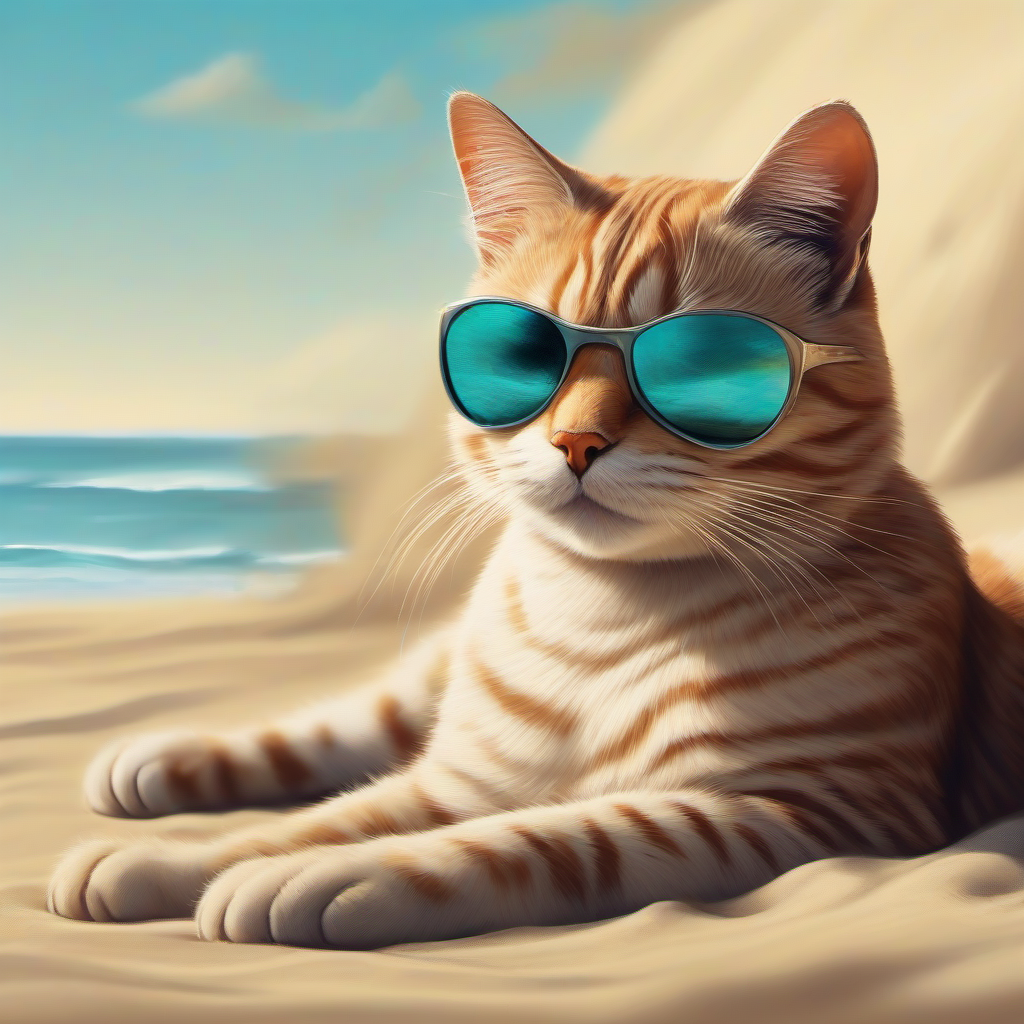

In [83]:
from IPython.display import Image, display
image_path = graphic_designer_agent_result['image_path']
# Display image directly
Image(image_path)

## 文案智能体

In [84]:
def copywriter_agent(image_path: str, trend_summary: str, model: str = "openai:o4-mini") -> dict:

    """
    使用 aisuite（仅 OpenAI）发送图像与趋势摘要并返回活动短句。

    参数：
        image_path (str)：待分析图像的路径。
        trend_summary (str)：来自调研智能体的文本。
        model (str)：OpenAI 模型（例如 openai:o4-mini、openai:gpt-4o）

    返回：
        dict: {
            "quote": "...",
            "justification": "...",
            "image_path": "..."
        }
    """

    utils.log_agent_title_html("文案智能体", "✍️")

    # 步骤 1: 加载本地图像并编码为 base64
    with open(image_path, "rb") as f:
        img_bytes = f.read()

    b64_img = base64.b64encode(img_bytes).decode("utf-8")

    # 步骤 2: 构建兼容 OpenAI 的多模态消息
    messages = [
        {
            "role": "system",
            "content": "你是一名文案撰写者，基于图像与市场趋势摘要创作优雅的活动短句。"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{b64_img}",
                        "detail": "auto"
                    }
                },
                {
                    "type": "text",
                    "text": f"""
以下为一个视觉营销图像与趋势分析：

趋势摘要：
\"\"\"{trend_summary}\"\"\"

请返回如下 JSON 对象：
{{
  "quote": "简短、优雅的活动短句（最多 12 个词）",
  "justification": "为何该短句契合该图像与趋势"
}}"""
                }
            ]
        }
    ]

    # 步骤 3: 通过 aisuite 发送请求
    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )

    # 步骤 4: 解析 JSON 响应
    content = response.choices[0].message.content.strip()

    utils.log_final_summary_html(content)

    try:
        match = re.search(r'\{.*\}', content, re.DOTALL)
        parsed = json.loads(match.group(0)) if match else {"error": "No valid JSON returned"}
    except Exception as e:
        parsed = {"error": f"Failed to parse: {e}", "raw": content}


    parsed["image_path"] = image_path
    return parsed

In [85]:
copywriter_agent_result = copywriter_agent(
    image_path=graphic_designer_agent_result["image_path"],
    # image_path = "test_img.png",
    trend_summary=market_research_result,
    model='huggingface:Qwen/Qwen3-VL-8B-Instruct'
)

## 打包智能体

In [86]:
def packaging_agent(trend_summary: str, image_url: str, quote: str, justification: str, output_path: str = "campaign_summary.md") -> str:

    """
    将活动资产打包为精美的 Markdown 报告，供高管审阅。

    Args:
        trend_summary (str)：市场趋势摘要。
        image_url (str)：活动图像的 URL。
        quote (str)：需叠加的营销短句。
        justification (str)：短句的理由说明。
        output_path (str)：保存 Markdown 报告的路径。

    Returns:
        str：已保存的 Markdown 文件路径。
    """

    utils.log_agent_title_html("打包智能体", "📦")

    # 我们在 <img> 的 src 中使用此路径
    styled_image_html = f"""
![打开生成的文件查看]({image_url})
    """

    beautified_summary = client.chat.completions.create(
        # model="openai:o4-mini",
        model="deepseek:deepseek-chat",
        messages=[
            {"role": "system", "content": "你是一名市场传播专家，为高管撰写优雅的活动总结。"},
            {"role": "user", "content": f"""
请将以下趋势摘要改写为清晰、专业且适合 CEO 受众的表达：

\"\"\"{trend_summary.strip()}\"\"\"
"""}
        ]
    ).choices[0].message.content.strip()

    utils.log_tool_result_html(beautified_summary)

    # 将所有部分合并为 markdown
    markdown_content = f"""# 🕶️ 夏季太阳镜活动 – 高管摘要

## 📊 精炼的趋势洞见
{beautified_summary}

## 🎯 活动视觉
{styled_image_html}

## ✍️ 活动短句
{quote.strip()}

## ✅ 原因说明
{justification.strip()}

---

*报告生成日期 {datetime.now().strftime('%Y-%m-%d')}*
"""

    with open(output_path, "w", encoding="utf-8") as f:
        f.write(markdown_content)

    return output_path

In [87]:
packaging_agent_result = packaging_agent(
    trend_summary=market_research_result,
    image_url=graphic_designer_agent_result["image_path"],
    # image_url="test_img.png",
    quote=copywriter_agent_result["quote"],
    justification=copywriter_agent_result["justification"],
    output_path=f"campaign_summary_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.md"
)

In [88]:
# 加载并渲染 Markdown 内容
with open(packaging_agent_result, "r", encoding="utf-8") as f:
    md_content = f.read()

display(Markdown(md_content))

# 🕶️ 夏季太阳镜活动 – 高管摘要

## 📊 精炼的趋势洞见
以下是为首席执行官精心撰写的夏季太阳镜活动趋势分析，内容经过提炼，以战略视角呈现关键洞察：

---

**致首席执行官：夏季太阳镜活动趋势分析摘要**

基于对当前时尚趋势及内部产品组合的深入评估，我们识别出以下关键机遇，可有效提升夏季太阳镜系列的市场表现：

### 一、核心趋势与产品契合点

1. **复古未来主义风潮**  
   - 市场动向：融合70至80年代复古元素与现代设计，以金属框架、渐变镜片及几何轮廓为特色。  
   - 产品匹配：Aviator Classic 与 Oval Retro 系列完美呼应此趋势，兼具经典美学与当代吸引力，适配多元社交场景。

2. **超大框型与护目镜款式**  
   - 市场动向：强调醒目造型与全面紫外线防护，兼具功能与风格表达。  
   - 产品匹配：Oversized Square 及 Cat-Eye Dramatic 款式契合消费者对防护与时尚的双重需求，尤其适合户外及休闲场合。

3. **可持续材质应用**  
   - 市场动向：消费者日益关注环保，倾向选择生物基醋酸纤维、再生金属等材料。  
   - 产品匹配：Eco-Wood 系列与 Bio-Acetate Round 有效传递品牌可持续理念，同时保持设计水准与佩戴舒适度。

### 二、战略产品推荐

- **重点主打**：**Aviator Classic with Gradient Lenses**  
  精准捕捉复古未来主义潮流，渐变镜片提升视觉体验，经典设计适配广泛客群与应用场景。

- **次选补充**：**Oversized Square in Tortoise**  
  以超大框型与玳瑁纹样强化时尚表现，同时提供卓越防晒性能，满足夏季户外活动需求。

### 三、夏季活动战略价值

所选产品组合具备以下综合优势：  
- **功能保障**：全面紫外线防护，应对高强度日照；  
- **潮流引领**：高度契合当季流行，强化品牌时尚形象；  
- **场景覆盖**：适用于海滩度假、都市出行、运动休闲等多种夏季场景；  
- **体验优化**：轻质材质与人体工学设计确保长久佩戴舒适。

### 四、结语

此产品与趋势的组合，有望显著增强我们在夏季太阳镜市场的竞争力，同时深化品牌在设计与可持续性方面的价值主张。

---

此摘要旨在高效传达核心趋势与产品策略，供您决策参考。如需进一步细节或专项汇报，我随时准备提供支持。

## 🎯 活动视觉

![打开生成的文件查看](test_sd.png)
    

## ✍️ 活动短句
阳光下的慵懒时尚，猫也懂度假风。

## ✅ 原因说明
图像中戴墨镜的猫咪在沙滩上享受阳光，完美呼应‘复古未来主义’与‘超大框护目镜’趋势，同时用拟人化表达传递轻松、时髦的夏日氛围，契合可持续与舒适性诉求。

---

*报告生成日期 2025-11-22*


# 太阳镜营销文案制作流水线

In [ ]:
def run_sunglasses_campaign_pipeline(output_path: str = "campaign_summary.md") -> dict:
    """
    运行完整的夏季太阳镜活动流水线：
    1. 市场调研（搜索趋势并匹配产品）
    2. 生成视觉图像与文案
    3. 基于图像与趋势生成活动短句
    4. 创建高管版 Markdown 报告

    Returns:
        dict: 包含所有中间结果与最终报告路径的字典
    """
    # 1. 运行市场调研Agent
    trend_summary = market_research_agent()
    print("✅ 市场调研完成")

    # 2. 生成图像 + 文案
    visual_result = graphic_designer_agent(trend_insights=trend_summary)
    image_path = visual_result["image_path"]
    print("🖼️ 图像已生成")

    # 3. 基于图像 + 趋势生成短句
    quote_result = copywriter_agent(image_path=image_path, trend_summary=trend_summary)
    quote = quote_result.get("quote", "")
    justification = quote_result.get("justification", "")
    print("💬 短句已生成")

    # 4. 生成 markdown 报告
    md_path = packaging_agent(
        trend_summary=trend_summary,
        image_url=image_path,
        quote=quote,
        justification=justification,
        output_path=f"campaign_summary_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.md"
    )

    print(f"📦 报告已生成：{md_path}")

    return {
        "trend_summary": trend_summary,
        "visual": visual_result,
        "quote": quote_result,
        "markdown_path": md_path
    }

In [ ]:
results = run_sunglasses_campaign_pipeline()

In [ ]:
with open(results["markdown_path"], "r", encoding="utf-8") as f:
    md_content = f.read()
display(Markdown(md_content))